In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [3]:
N = 100
x_start, x_end = -1.0, 1.0
y_start, y_end = -1.5, 1.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [4]:
u_inf = 1.0

u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

In [5]:
class Source:
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x, y
    def velocity(self, X, Y):
        self.u = (self.strength / (2 * math.pi) *
                  (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        self.v = (self.strength / (2 * math.pi) *
                  (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
    def stream_function(self, X, Y):
        self.psi = (self.strength / (2 * math.pi) *
                    numpy.arctan2((Y - self.y), (X - self.x)))

In [8]:
N_sources = 11
strength = 5.0
strength_source = strength / N_source
x_source = numpy.zeros(N_source, dtype=float)
y_source = numpy.linspace(-1.0, 1.0, N_sources)

sources = numpy.empty(N_source, dtype=object)
for i in range(N_sources):
    sources[i] = Source(strength_source, x_source[i], y_source[i])
    sources[i].velocity(X, Y)
    
u = u_freestream.copy()
v = v_freestream.copy()
for source in sources:
    u += source.u
    v += source.v

(-1.5, 1.5)

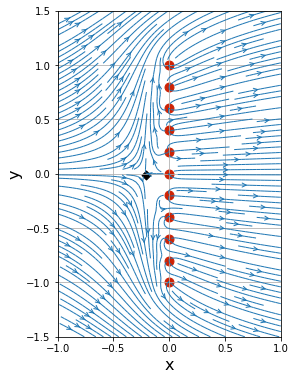

In [9]:
width = 4
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o')
magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)
pyplot.scatter(x[i_stagn], y[j_stagn],
               color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)

In [10]:
from scipy import integrate

In [11]:
print(integrate.quad(lambda x: x**2, 0.0, 1.0))

(0.33333333333333337, 3.700743415417189e-15)


In [12]:
a = 3.0
print(integrate.quad(lambda x, a: a * x**2, 0.0, 1.0, args=a))
b = 2.0
print(integrate.quad(lambda x, a, b: a * b * x**2, 0.0, 1.0, args=(a, b)))

(1.0, 1.1102230246251565e-14)
(2.0, 2.220446049250313e-14)


In [13]:
sigma = 2.5

y_min, y_max = -1.0, 1.0

integrand_u = lambda s, x, y: x / (x**2 + (y - s)**2)
integrand_v = lambda s, x, y: (y - s) / (x**2 + (y - s)**2)

def integration(x, y, integrand):
    return integrate.quad(integrand, y_min, y_max, args=(x, y))[0]

vec_integration = numpy.vectorize(integration)

u_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_v)

u = u_freestream + u_sheet
v = v_freestream + v_sheet

(-1.5, 1.5)

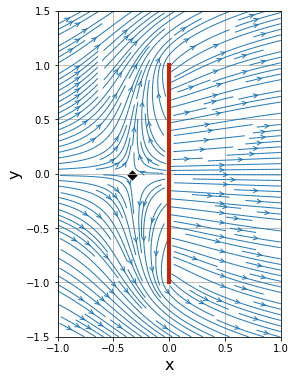

In [15]:
width = 4
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.axvline(0.0,
               (y_min - y_start) / (y_end - y_start),
               (y_max - y_start) / (y_end - y_start),
               color='#CD2305', linewidth=4)

magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)

pyplot.scatter(x[i_stagn], y[j_stagn],
               color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)